# Faza 1 - Prieskumná analýza
##### Authors: Karolina Skrypova a Oleh Fedunchyk

## Nacitanie kniznic 

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Otvorenie datasetov

In [3]:
profiles_data = pd.read_csv('dataset-120/profiles.csv', sep='\t')
connections_data = pd.read_csv('dataset-120/connections.csv', sep='\t')

## 1.1 Základný opis dát spolu s ich charakteristikami 

### A: Analýza štruktúr dát ako súbory (štruktúry a vzťahy, počet, typy, ...), záznamy(štruktúry, počet záznamov, počet atribútov, typy, ...)

#### Dataset 1: profiles

Na zaciatku pozrieme sa ako vyzeraju data v datasete profiles. 

In [4]:
profiles_data.head()

,registration,imei,username,ssn,user_id,name,job,address,current_location,birthdate,mail,company
0,02 Apr 2024,8630330696303481594,regina30,719-26-3476,507,Rebecca Moreno,"Librarian, public",Unit 5700 Box 8952\r\nDPO AP 70659,"(Decimal('43.251681'), Decimal('4.085137'))",1977-03-13,cjohnson@hotmail.com,Shepard Ltd
1,2021-10-02,863033069630348412,ronaldhughes,500-12-7252,1158,Joshua Hicks,NaN,NaN,"(Decimal('-7.708654'), Decimal('144.652216'))",1980-10-08,ggray@gmail.com,Coleman LLC
2,"05/23/2022, 00:00:00",8630330696303482477,zwarren,073-28-3258,2379,Rebecca Hudson,NaN,"4506 John Road\r\nMillerborough, ME 08112","(Decimal('53.531034'), Decimal('100.682080'))",NaN,eric54@yahoo.com,"Hinton, Fuller and French"
3,"03/23/2023, 00:00:00",3590433799317661230,grimessamuel,006-67-1751,954,Victoria Hughes,NaN,NaN,"(Decimal('-17.4220355'), Decimal('-30.820327'))",NaN,melissajohnson@gmail.com,"Erickson, Robinson and Bailey"
4,"09/17/2020, 00:00:00",359043379931766437,obrown,188-07-0566,1409,Michael Petersen,NaN,"94495 Smith Fork Suite 229\r\nChandlerberg, MD...",NaN,NaN,ryan13@yahoo.com,Murphy PLC


Tento dataset obsahuje informácie o používateľoch.

Pomocou niekolkych prikazov zistime viac informacii o datasete.

In [5]:
profiles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   registration      2535 non-null   object
 1   imei              2535 non-null   int64 
 2   username          2535 non-null   object
 3   ssn               2535 non-null   object
 4   user_id           2535 non-null   int64 
 5   name              2535 non-null   object
 6   job               761 non-null    object
 7   address           2155 non-null   object
 8   current_location  2408 non-null   object
 9   birthdate         1394 non-null   object
 10  mail              2535 non-null   object
 11  company           2535 non-null   object
dtypes: int64(2), object(10)
memory usage: 237.8+ KB


Pomocou prikazu info() zistili sme datove typy pre jednotlive atributy. 
Tiez sme zistili ze dataset ma v sebe 2535 riadkov.
Pocet atributov pre tento dataset je 12.
Vidime ze v tomto datasete 2 atributy maju typ int, a ostatne object. 
Taktiez sme zistili range index, a hned je vidno kolko poloziek nie su nulove v jednotlivych atributoch.

**Atributy:**
- registation - datum: datum registracie
- imei - cislo: unikatne cislo pre kazdy mobilne zariadenie
- username - text: pouzivatelske meno
- ssn - specificky typ: Social Security number; cislo pre identifikaciu obcana
- user_id - cislo: unikatne cislo pre kazdeho pouzivatela
- name - text: meno pouzivatela
- job - text: povolanie pouzivatela
- address - text: adresa pouzivatela
- current_location - text: aktualna poloha pouzivatela
- birthdate - datum: datum narodenia pouzivatela
- mail - text: email pouzivatela
- company - text: firma pouzivatela

In [35]:
profiles_data.describe(exclude=np.number)

,registration,username,ssn,name,job,address,current_location,birthdate,mail,company
count,2535,2535,2535,2535,761,2155,2408,1394,2535,2535
unique,2233,2489,2535,2482,445,2155,2408,1377,2525,2409
top,08 Nov 2020,zwhite,663-26-6444,Michael Martinez,"Exhibitions officer, museum/gallery","971 Griffin Landing\r\nNew Patricia, CT 88011","(Decimal('59.762173'), Decimal('123.344113'))",1908-09-24,mitchelldavid@yahoo.com,Johnson Group
freq,5,3,1,4,6,1,1,2,2,5


Sem sme spravili Univariate analysis pre jednotlive atributy.

In [9]:
profiles_data.dropna().shape[0]


328

328 riadkov maju vsetky atributy vyplnene.

In [10]:
profiles_data.shape[0] - profiles_data.dropna().shape[0]

2207

2207 riadkov maju aspon jeden atribut nevyplneny.

In [15]:
profiles_data.nunique()

registration        2233
imei                 494
username            2489
ssn                 2535
user_id             1578
name                2482
job                  445
address             2155
current_location    2408
birthdate           1377
mail                2525
company             2409
dtype: int64

Nunique ukaze nam kolko unikatnych hodnot je v jednotlivych atributoch. 

In [21]:
profiles_data.shape[0] - profiles_data.drop_duplicates().shape[0]

0

Pocet duplikatov riadkov je 0.

In [25]:
profiles_data.isnull().sum()

registration           0
imei                   0
username               0
ssn                    0
user_id                0
name                   0
job                 1774
address              380
current_location     127
birthdate           1141
mail                   0
company                0
dtype: int64

Pocet nullovyh hodnot v jednotlivych atributoch

#### Dataset 2: connections
Na zaciatku pozrieme sa ako vyzeraju data v datasete profiles. 

In [8]:
connections_data.head()

,ts,imei,mwra,c.katana,c.dogalize,c.android.gm,c.android.chrome,c.android.youtube,c.UCMobile.intl,c.updateassist,c.UCMobile.x86,c.android.vending,c.raider
0,2018-05-05 10:00:00,3590433799317661339,1.0,12.59948,8.68233,10.47388,10.83279,9.88566,42.78450,68.04373,48.16608,29.46806,62.29823
1,2018-05-05 10:01:00,8630330696303481149,0.0,10.12035,13.40907,9.91671,12.68924,9.97613,41.56210,50.81831,34.35584,27.40876,58.79877
2,2018-05-05 10:02:00,3590433799317662295,0.0,15.37526,17.28039,17.43219,11.82565,13.14464,68.96152,42.46043,52.57066,42.52979,14.00816
3,2018-05-05 10:03:00,3590433799317662113,0.0,12.23041,8.08404,11.92790,12.78835,12.77756,61.50057,62.83317,43.63141,78.21635,85.93087
4,2018-05-05 10:04:00,359043379931766486,1.0,10.15839,8.09159,11.92699,7.43053,9.74092,61.38455,64.47625,34.24340,68.61573,3.01488


Pomocou niekolkych prikazov zistime viac informacii o datasete.


In [9]:
connections_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15145 entries, 0 to 15144
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 15145 non-null  object 
 1   imei               15145 non-null  int64  
 2   mwra               15145 non-null  float64
 3   c.katana           15145 non-null  float64
 4   c.dogalize         15145 non-null  float64
 5   c.android.gm       15145 non-null  float64
 6   c.android.chrome   15145 non-null  float64
 7   c.android.youtube  15145 non-null  float64
 8   c.UCMobile.intl    15145 non-null  float64
 9   c.updateassist     15145 non-null  float64
 10  c.UCMobile.x86     15145 non-null  float64
 11  c.android.vending  15145 non-null  float64
 12  c.raider           15145 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


Pomocou prikazu info() zistili sme datove typy pre jednotlive atributy. 
Tiez sme zistili ze dataset ma v sebe 15145 riadkov.
Pocet atributov pre tento dataset je 13.
Vidime ze v tomto datasete 11 atributov maju typ float, 1 atribut - typ int a jeden atribut typ object. 
Taktiez sme zistili range index, a hned je vidno kolko poloziek nie su nulove v jednotlivych atributoch.
V tomto datasete vsetky riadky maju vsetky atributy vyplnene.

**Atributy:**
- ts - timestamp: datum a cas
- imei - int: unikatne cislo pre kazde mobilne zariadenie
- mwra - float: hodnoty medzi 0 a 1. Uple nevieme co to znamena.
- c.katana, c.dogalize, c.android.gm, c.android.chrome, c.android.youtube, c.UCMobile.intl, c.updateassist, c.UCMobile.x86, c.android.vending, c.raider - 
float: tieto atributy znamenaju nejake cinnosti alebo aplikacie ktore pouzivatel pouziva na svojom mobilnom zariadeni. Kazdy stlpec ma meno podla aplikacie. Tieto hodnoty znamenaju nejaky metricky udaj.

Univariate analysis:

continuous:

In [11]:
connections_data.describe()

,imei,mwra,c.katana,c.dogalize,c.android.gm,c.android.chrome,c.android.youtube,c.UCMobile.intl,c.updateassist,c.UCMobile.x86,c.android.vending,c.raider
count,1.514500e+04,15145.000000,15145.000000,15145.000000,15145.000000,15145.000000,15145.000000,15145.000000,15145.000000,15145.000000,15145.000000,15145.000000
mean,3.888406e+18,0.625157,12.753468,10.978112,12.170533,11.617357,11.626803,60.290531,54.567888,51.059147,49.678824,49.810844
std,3.334890e+18,0.484098,1.863855,2.705844,2.392459,2.500184,2.490396,11.088297,11.328329,12.209954,28.978242,28.866897
min,3.590434e+17,0.000000,5.577070,2.953200,0.000000,2.433500,0.873520,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.630331e+17,0.000000,11.493940,8.968680,10.776180,9.946600,10.077080,52.925080,47.021990,42.745990,24.693380,24.690250
50%,3.590434e+18,1.000000,12.747460,10.882380,12.374110,11.857690,11.934540,60.321530,54.615610,50.992960,49.257060,49.491280
75%,8.630331e+18,1.000000,14.003480,12.896070,13.793090,13.402420,13.396620,67.661290,62.179120,59.253310,74.859170,74.916930
max,8.630331e+18,1.000000,20.062980,21.529560,21.292520,20.337690,19.879360,100.000000,100.000000,100.000000,100.000000,100.000000


categorical:

In [37]:
connections_data.describe(exclude=np.number)

,ts
count,15145
unique,14965
top,2018-05-06 20:17:00
freq,2


Nasledujuci prikaz podtvrdzuje ze vsetky riadky maju vsetky atributy vyplnene.

In [26]:
connections_data.dropna().shape[0]


15145

Tento prikaz ukazuje pocet unikatnych hodnot v jednotlivych atributoch.

In [28]:
connections_data.nunique()

ts                   14965
imei                   500
mwra                     2
c.katana             14785
c.dogalize           14859
c.android.gm         14838
c.android.chrome     14855
c.android.youtube    14825
c.UCMobile.intl      14927
c.updateassist       14929
c.UCMobile.x86       14936
c.android.vending    14961
c.raider             14958
dtype: int64

Pocet duplikatnych riadkov je 180 podla prikazu nizsie.

In [29]:
connections_data.shape[0] - connections_data.drop_duplicates().shape[0]

180

#### Dataset 3: devices

#### Dataset 4: proccesses

### B:  Analýza jednotlivých atribútov: pre zvolené významné atribúty (min 10) analyzujte ich distribúcie a základné deskriptívne štatistiky.

#### Dataset 1: profiles
##### Vyznamne atributy:


**Registation date**

Format registation date to same format.

In [44]:
src = profiles_data["registration"]
def dataConvertion(src):
    src = pd.to_datetime(src, format='mixed')
    return src
profiles_data["formatted_registration"] = dataConvertion(src)

,registration,imei,username,ssn,user_id,name,job,address,current_location,birthdate,mail,company,formatted_registration
0,02 Apr 2024,8630330696303481594,regina30,719-26-3476,507,Rebecca Moreno,"Librarian, public",Unit 5700 Box 8952\r\nDPO AP 70659,"(Decimal('43.251681'), Decimal('4.085137'))",1977-03-13,cjohnson@hotmail.com,Shepard Ltd,2024-04-02
1,2021-10-02,863033069630348412,ronaldhughes,500-12-7252,1158,Joshua Hicks,NaN,NaN,"(Decimal('-7.708654'), Decimal('144.652216'))",1980-10-08,ggray@gmail.com,Coleman LLC,2021-10-02
2,"05/23/2022, 00:00:00",8630330696303482477,zwarren,073-28-3258,2379,Rebecca Hudson,NaN,"4506 John Road\r\nMillerborough, ME 08112","(Decimal('53.531034'), Decimal('100.682080'))",NaN,eric54@yahoo.com,"Hinton, Fuller and French",2022-05-23
3,"03/23/2023, 00:00:00",3590433799317661230,grimessamuel,006-67-1751,954,Victoria Hughes,NaN,NaN,"(Decimal('-17.4220355'), Decimal('-30.820327'))",NaN,melissajohnson@gmail.com,"Erickson, Robinson and Bailey",2023-03-23
4,"09/17/2020, 00:00:00",359043379931766437,obrown,188-07-0566,1409,Michael Petersen,NaN,"94495 Smith Fork Suite 229\r\nChandlerberg, MD...",NaN,NaN,ryan13@yahoo.com,Murphy PLC,2020-09-17


Vidime kolko pouzivatelov sa zaregistrovalo v jednotlivych rokoch.

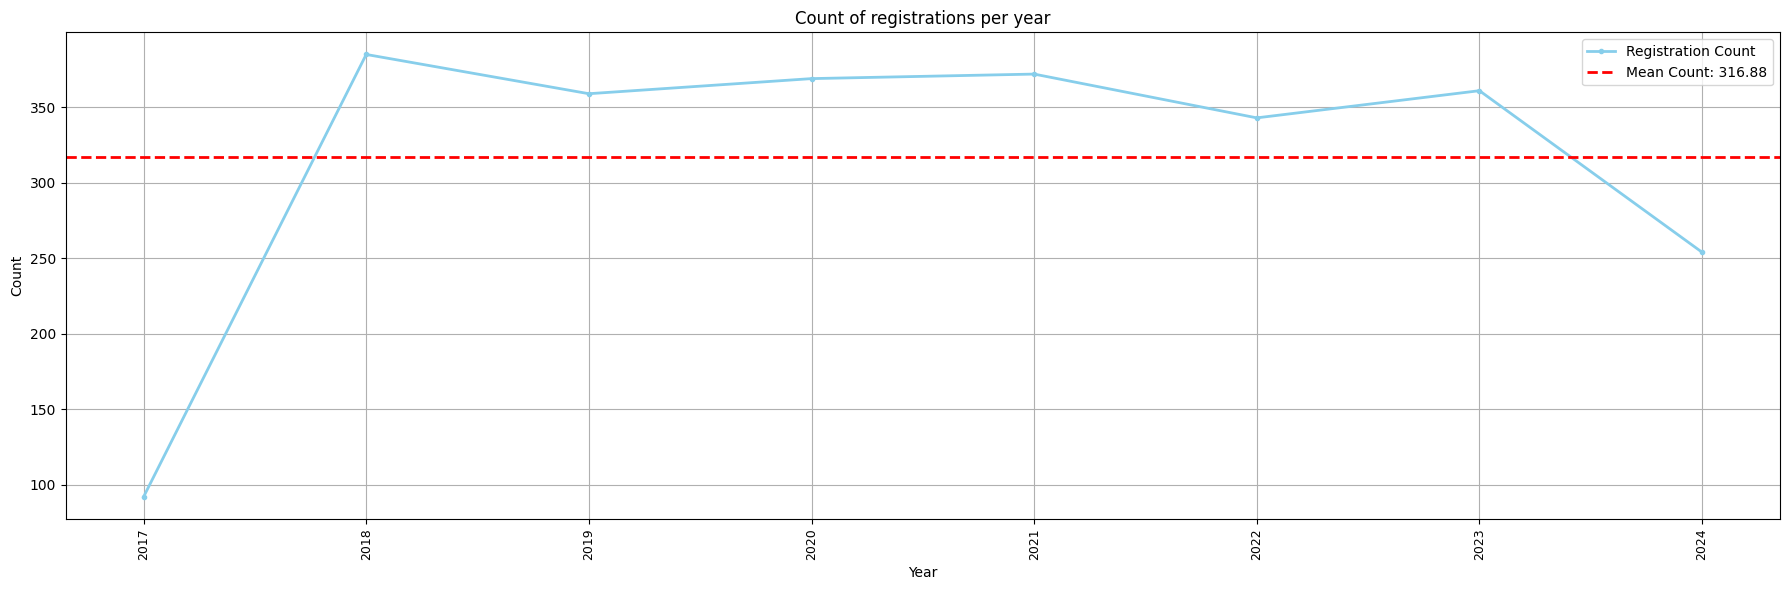

In [47]:
registration_date = pd.to_datetime(profiles_data['formatted_registration'])
profiles_data["registration_year"] = registration_date.dt.year

group = profiles_data.groupby('registration_year').size().reset_index(name='count')
mean_count = group['count'].mean()


plt.figure(figsize=(18, 6))
plt.plot(group['registration_year'], group['count'], marker='o', color='skyblue', linewidth=2, markersize=3, label='Registration Count')
plt.title('Count of registrations per year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=9)
plt.grid(True)

plt.axhline(mean_count, color='red', linestyle='dashed', linewidth=2, label=f'Mean Count: {mean_count:.2f}')

plt.legend()

plt.tight_layout()
plt.show()

#### Dataset 2: connections

#### Dataset 3: devices


#### Dataset 4: devices
